In [1]:
from matplotlib import pyplot as plt

import csv
import os
import numpy

In [2]:
def readDir(path):
    """
    :param path: Dictionary Path
    :return: type(List)
    """
    if os.path.exists(path):
        files = []
        file_names = []
        _files = os.listdir(path)
        for file in _files:
            if 'csv' in file.split('.'):
                file_names.append(f'{file}')
                files.append(f'{path}/{file}')

        if len(files) == 0:
            raise FileNotFoundError

        csv_datas = []

        for csv_file in files:
            csv_lines = []
            f = open(csv_file, 'r')
            rdr = csv.reader(f)
            for line in rdr:
                csv_lines.append(line)

            csv_datas.append(csv_lines)

        return csv_datas, file_names

    else:
        raise FileNotFoundError


In [3]:
def readTimeData(csv_datas):
    if len(csv_datas) == 0:
        raise IOError

    data_rows = []
    for csv_data in csv_datas:
        time_rows = []
        for csv_rows in csv_data:
            time_data = []
            for string in csv_rows:
                if len(string.split('.')) > 1:
                    time_d = float(string)
                elif len(string.split('.')) <= 1 and string.isnumeric():
                    time_d = int(string)
                else:
                    time_d = str(string)

                time_data.append(time_d)
            time_rows.append(time_data)
        data_rows.append(time_rows)
    return data_rows



In [13]:

def graphData(data_rows, name):
    for idx, data in enumerate(data_rows):
        time_idx = []
        time_dep = []
        time_n = []
        time_gp_n = []
        time_lp_n = []
        time_gp_graph = []
        time_lp_graph = []

        for time_data in data:
            if len(time_data) < 3:
                continue
            if len(time_data) == 3:
                # 통합
                t_i = time_data[0]
                t_d = time_data[1]
                t_n = time_data[2] * 1000
                time_idx.append(t_i)
                time_dep.append(t_d)
                time_n.append(t_n)

            if len(time_data) > 3:
                # GP, LP 분리
                t_i = time_data[0]
                t_d = time_data[1]
                t_n = time_data[2] * 1000
                t_t = time_data[3]

                time_idx.append(t_i)
                time_dep.append(t_d)
                
                
                if t_t == "gp":
                    # time_lp_n.append(0)
                    time_lp_graph.append(0)
                    time_gp_graph.append(t_n)
                    time_gp_n.append(t_n)
                elif t_t == "lp":
                    time_lp_n.append(t_n)
                    time_lp_graph.append(t_n)
                    time_gp_graph.append(0)
                    # time_gp_n.append(0)

        print("/n/n---------------------------")
        print(f"Result of {name[idx]}")
        # print(f"Intervals: {t_i}")
        if time_gp_n == [] and time_lp_n == []:
            print(f"Mean:   {round(numpy.mean(time_n), 6)}")

            # print(f"Median: {round(numpy.median(time_n), 6)}")
            # print(f"Max:    {round(max(time_n), 6)}")
            # print(f"Min:    {round(min(time_n), 6)}")
            # print(f"Total Time: {round(t_d, 6)}")

            plt.grid()
            # colors = ["tab:red" if val < 100 else "tab:blue" for val in time_n]
            plt.title(name[idx])
            plt.ylabel("milliseconds")
            plt.xlabel("interval(s)")
            plt.bar(time_idx, time_n, width=1)
            plt.show()

        else:
            print(f"Mean GP:   {round(numpy.mean(time_gp_n), 6)}")
            print(f"Mean LP:   {round(numpy.mean(time_lp_n), 6)}")
            # print(f"Median: {round(numpy.median(time_n), 6)}")
            # print(f"Max:    {round(max(time_n), 6)}")
            # print(f"Min:    {round(min(time_n), 6)}")
            # print(f"Total Time: {round(t_d, 6)}")

            plt.grid()
            # colors = ["tab:red" if val < 100 else "tab:blue" for val in time_n]
            plt.title(name[idx])
            plt.ylabel("millisecond(s)")
            plt.xlabel("interval(s)")
            plt.bar(time_idx, time_gp_graph, width=1, color="tab:blue")
            plt.bar(time_idx, time_lp_graph, width=1, color="tab:red")
            plt.show()



Vegas_obs
---------------------------
Result of odg_pf_pp_time_data.csv
Mean GP:   2.378347
Mean LP:   6.924544


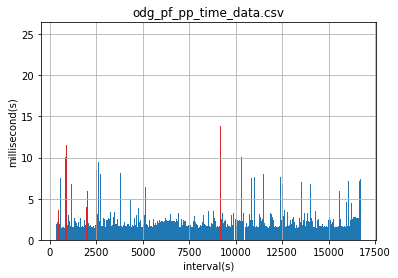

---------------------------
Result of fgm_gnu_time_data.csv
Mean:   1.609798


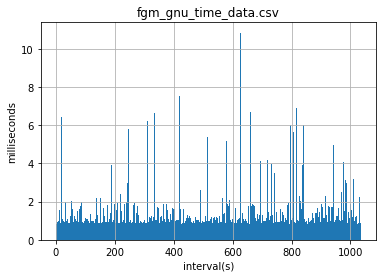

---------------------------
Result of fgm_pp_time_data.csv
Mean GP:   2.254006
Mean LP:   4.57888


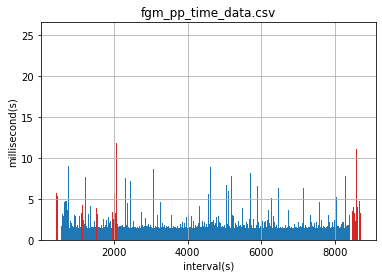

---------------------------
Result of fgm_stech_time_data.csv
Mean:   1.390968


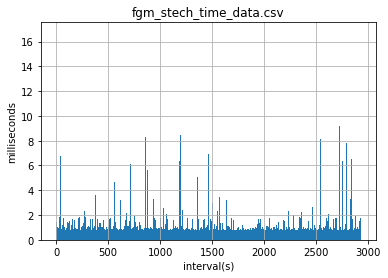

---------------------------
Result of odg_pf_time_data.csv
Mean:   5.514631


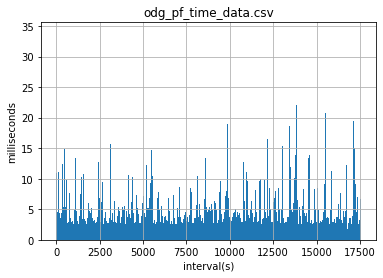

In [15]:
data, name = readDir('record/vegas_obs')
time_data = readTimeData(data)

print("Vegas_obs")
graphData(time_data, name)

curve
---------------------------
Result of odg_pf_pp_time_data.csv
Mean GP:   2.157664
Mean LP:   nan


/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


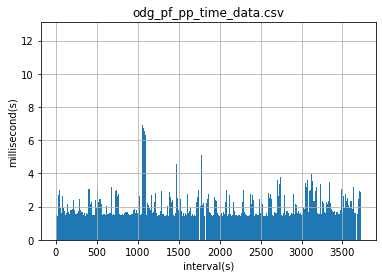

---------------------------
Result of fgm_gnu_time_data.csv
Mean:   1.463619


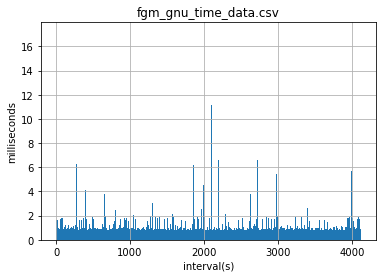

---------------------------
Result of fgm_pp_time_data.csv
Mean GP:   2.047417
Mean LP:   nan


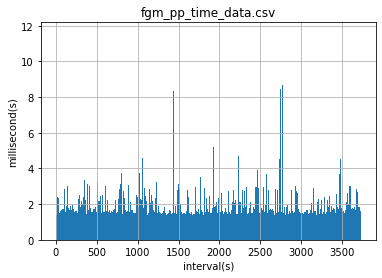

---------------------------
Result of fgm_stech_time_data.csv
Mean:   1.165179


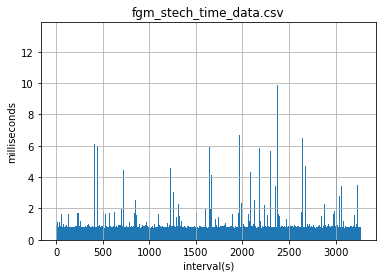

---------------------------
Result of odg_pf_time_data.csv
Mean:   3.809801


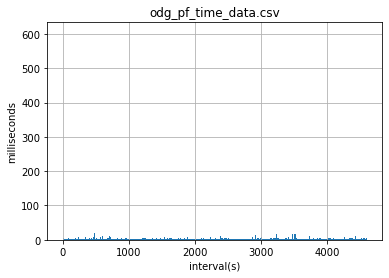

In [16]:
data, name = readDir('record/curve')
time_data = readTimeData(data)

print("curve")
graphData(time_data, name)

Obstacle 1
---------------------------
Result of odg_pf_pp_time_data.csv
Mean GP:   2.287684
Mean LP:   nan


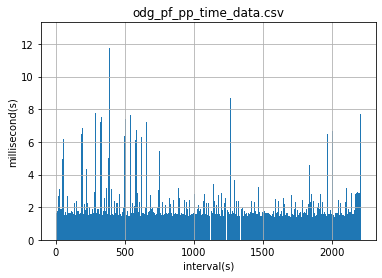

---------------------------
Result of fgm_gnu_time_data.csv
Mean:   1.33348


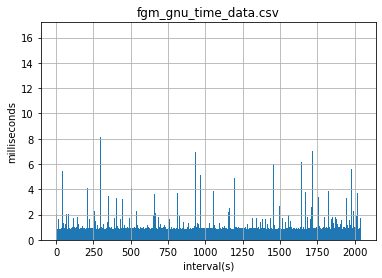

---------------------------
Result of fgm_pp_time_data.csv
Mean GP:   2.240058
Mean LP:   nan


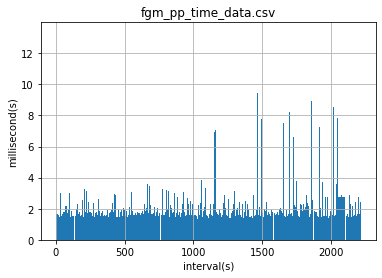

---------------------------
Result of fgm_stech_time_data.csv
Mean:   1.205143


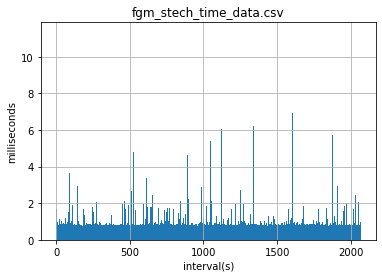

---------------------------
Result of odg_pf_time_data.csv
Mean:   4.779781


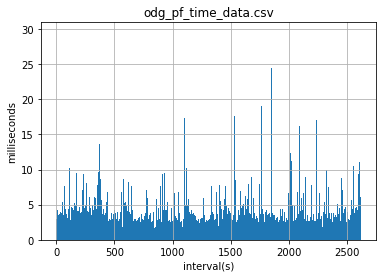

In [20]:
data, name = readDir('record/obstacle_1')
time_data = readTimeData(data)

print("Obstacle 1")
graphData(time_data, name)

Obstacle 2
---------------------------
Result of odg_pf_pp_time_data.csv
Mean GP:   2.247278
Mean LP:   nan


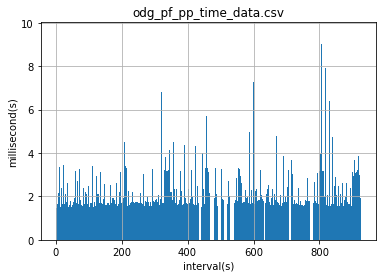

---------------------------
Result of fgm_gnu_time_data.csv
Mean:   1.336028


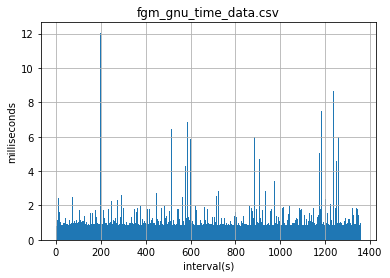

---------------------------
Result of fgm_pp_time_data.csv
Mean GP:   2.276889
Mean LP:   nan


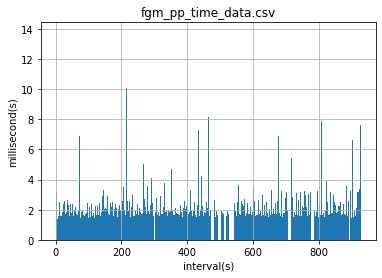

---------------------------
Result of fgm_stech_time_data.csv
Mean:   1.237962


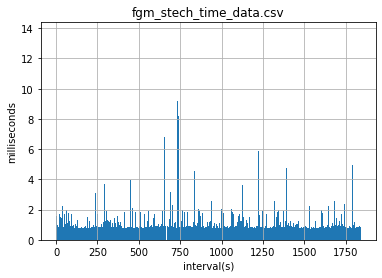

---------------------------
Result of odg_pf_time_data.csv
Mean:   3.70391


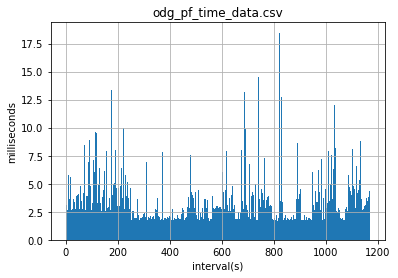

In [18]:
data, name = readDir('record/obstacle_2')
time_data = readTimeData(data)

print("Obstacle 2")
graphData(time_data, name)

racing
---------------------------
Result of odg_pf_pp_time_data.csv
Mean GP:   2.465446
Mean LP:   nan


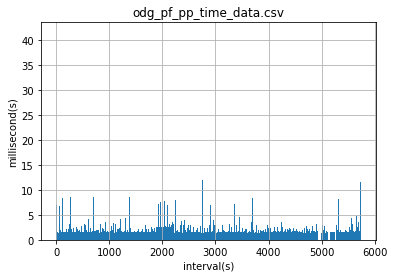

---------------------------
Result of fgm_gnu_time_data.csv
Mean:   1.466633


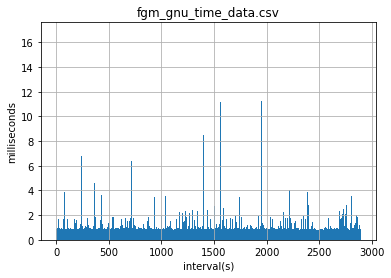

---------------------------
Result of fgm_pp_time_data.csv
Mean GP:   2.380228
Mean LP:   5.040678


ValueError: shape mismatch: objects cannot be broadcast to a single shape

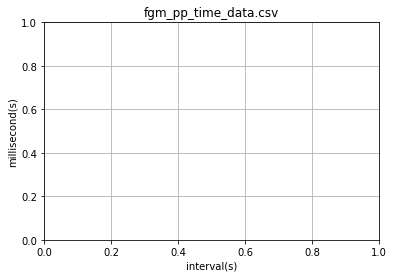

In [19]:
data, name = readDir('record/racing')
time_data = readTimeData(data)

print("racing")
graphData(time_data, name)